In [1]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import re
import datetime
import tqdm

import seaborn as sns

import tensorflow as tf
import keras.backend.tensorflow_backend as ktf
from keras.models import *
from keras.layers import *
from keras.layers.core import Lambda
from keras import backend as K
from keras.callbacks import EarlyStopping, TensorBoard

%matplotlib inline
from numpy import concatenate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import keras
from time import time
#from tensorflow.python.keras.callbacks import TensorBoard


Using TensorFlow backend.


In [6]:
dataset1 = pd.read_excel("Punjabi_bagh_2016.xlsx")
dataset2 = pd.read_excel("Punjabi_bagh_2017.xlsx")
dataset3 = pd.read_excel("Punjabi_bagh_2018.xlsx")
dataset4 = pd.read_excel("Punjabi_bagh_2019.xlsx")

dataset4 = dataset4.drop([4050, 4051, 4052, 4053, 4054, 4055])

print(len(dataset1)+len(dataset2)+len(dataset3)+len(dataset4))

frames = [dataset1, dataset2, dataset3, dataset4]
result_date_index = pd.concat(frames, sort = True)
result_date_index = result_date_index.set_index(["To Date"])
result_date_index = result_date_index.drop(['Temp', 'THC', 'VWS', 'From Date'], axis=1)
result_date_index.index = pd.to_datetime(result_date_index.index, dayfirst=True)


#Do this befor adding date and time, cause else it makes it also nans
result = result_date_index.replace("None", 0)
result = result.replace(0, 0)
#result = result.reset_index()
#result = result.drop("To Date", axis = 1)


30365


In [81]:
result.head(50)

,AT,BP,CO,NO,NO2,Ozone,PM10,PM2.5,RH,SO2,SR,WD,WS
To Date,,,,,,,,,,,,,
2016-01-01 01:00:00,10.22,738.00,0.34,72.91,99.96,11.85,528.33,334.00,67.33,21.33,15.00,153.08,0.43
2016-01-01 02:00:00,9.37,738.00,0.47,94.07,86.74,11.23,528.67,354.00,70.83,26.85,14.92,145.92,0.30
2016-01-01 03:00:00,9.22,738.00,0.58,82.03,87.12,12.07,663.40,354.00,71.92,26.84,14.58,158.83,0.46
2016-01-01 04:00:00,8.96,738.00,1.03,48.89,84.37,11.44,619.67,354.00,72.33,26.66,14.75,150.25,0.30
2016-01-01 05:00:00,8.47,738.33,1.25,57.62,75.45,13.43,555.33,350.00,73.33,16.59,14.75,146.25,0.31
2016-01-01 06:00:00,8.33,738.50,0.92,49.82,79.92,9.60,459.67,330.00,73.92,14.90,14.58,107.08,0.48
2016-01-01 07:00:00,7.93,738.58,1.03,55.43,79.58,10.60,436.17,333.83,74.08,15.04,14.83,92.50,0.32
2016-01-01 08:00:00,8.44,738.00,1.34,67.86,84.30,11.07,496.80,346.17,73.08,17.07,28.33,89.42,0.34
2016-01-01 09:00:00,10.55,738.00,1.43,71.96,105.91,11.67,455.00,312.33,65.92,41.89,52.67,73.33,0.57


In [11]:
dataset_2016 = result.head(8783)
dataset_2017 = result.iloc[8784: 17543, :]
dataset_2018 = result.iloc[17544:26314, :]
dataset_2019 = result.iloc[26315:, :]

In [16]:
dataset_2019.tail()

,AT,BP,CO,NO,NO2,Ozone,PM10,PM2.5,RH,SO2,SR,WD,WS
To Date,,,,,,,,,,,,,
2019-06-18 14:00:00,30.77,734.19,0.62,3.07,21.48,54.50,59.75,0.0,36.53,8.62,120.80,89.0,2.02
2019-06-18 15:00:00,30.55,734.31,0.60,2.42,16.48,60.30,74.75,36.0,34.27,7.10,186.98,85.0,1.30
2019-06-18 16:00:00,29.77,734.25,0.67,2.60,19.88,62.97,59.00,36.0,0.90,11.40,156.38,78.5,1.12
2019-06-18 17:00:00,28.98,734.17,0.67,2.23,22.95,60.73,60.25,0.0,0.90,9.20,104.75,87.5,0.95
2019-06-18 17:54:00,28.52,734.03,0.77,1.95,21.15,63.00,64.00,0.0,0.90,10.38,72.33,69.5,1.27


In [17]:
jan_2016 = dataset_2016.loc[(dataset_2016.index.month == 1)]
feb_2016 = dataset_2016.loc[(dataset_2016.index.month == 2)]
mar_2016 = dataset_2016.loc[(dataset_2016.index.month == 3)]
apr_2016 = dataset_2016.loc[(dataset_2016.index.month == 4)]
may_2016 = dataset_2016.loc[(dataset_2016.index.month == 5)]
june_2016 = dataset_2016.loc[(dataset_2016.index.month ==6)]
july_2016 = dataset_2016.loc[(dataset_2016.index.month ==7)]
aug_2016 = dataset_2016.loc[(dataset_2016.index.month == 8)]
sept_2016 = dataset_2016.loc[(dataset_2016.index.month ==9)]
oct_2016 = dataset_2016.loc[(dataset_2016.index.month == 10)]
nov_2016 = dataset_2016.loc[(dataset_2016.index.month == 11)]
dec_2016 = dataset_2016.loc[(dataset_2016.index.month == 12)]

grishma_2016 = pd.concat([may_2016, june_2016])
vasant_2016 = pd.concat([mar_2016, apr_2016])
varsha_2016 = pd.concat([june_2016, july_2016])
sharad_2016 = pd.concat([sept_2016, oct_2016])
hemant_2016 = pd.concat([nov_2016, dec_2016])
shishir_2016 =  pd.concat([jan_2016, feb_2016])

jan_2017 = dataset_2017.loc[(dataset_2017.index.month == 1)]
feb_2017 = dataset_2017.loc[(dataset_2017.index.month == 2)]
mar_2017 = dataset_2017.loc[(dataset_2017.index.month == 3)]
apr_2017 = dataset_2017.loc[(dataset_2017.index.month == 4)]
may_2017 = dataset_2017.loc[(dataset_2017.index.month == 5)]
june_2017 = dataset_2017.loc[(dataset_2017.index.month ==6)]
july_2017 = dataset_2017.loc[(dataset_2017.index.month ==7)]
aug_2017 = dataset_2017.loc[(dataset_2017.index.month == 8)]
sept_2017 = dataset_2017.loc[(dataset_2017.index.month ==9)]
oct_2017 = dataset_2017.loc[(dataset_2017.index.month == 10)]
nov_2017 = dataset_2017.loc[(dataset_2017.index.month == 11)]
dec_2017 = dataset_2017.loc[(dataset_2017.index.month == 12)]

grishma_2017 = pd.concat([may_2017, june_2017])
vasant_2017 = pd.concat([mar_2017, apr_2017])
varsha_2017 = pd.concat([june_2017, july_2017])
sharad_2017 = pd.concat([sept_2017, oct_2017])
hemant_2017 = pd.concat([nov_2017, dec_2017])
shishir_2017 =  pd.concat([jan_2017, feb_2017])

jan_2018 = dataset_2018.loc[(dataset_2018.index.month == 1)]
feb_2018 = dataset_2018.loc[(dataset_2018.index.month == 2)]
mar_2018 = dataset_2018.loc[(dataset_2018.index.month == 3)]
apr_2018 = dataset_2018.loc[(dataset_2018.index.month == 4)]
may_2018 = dataset_2018.loc[(dataset_2018.index.month == 5)]
june_2018 = dataset_2018.loc[(dataset_2018.index.month ==6)]
july_2018 = dataset_2018.loc[(dataset_2018.index.month ==7)]
aug_2018 = dataset_2018.loc[(dataset_2018.index.month == 8)]
sept_2018 = dataset_2018.loc[(dataset_2018.index.month ==9)]
oct_2018 = dataset_2018.loc[(dataset_2018.index.month == 10)]
nov_2018 = dataset_2018.loc[(dataset_2018.index.month == 11)]
dec_2018 = dataset_2018.loc[(dataset_2018.index.month == 12)]

grishma_2018 = pd.concat([may_2018, june_2018])
vasant_2018 = pd.concat([mar_2018, apr_2018])
varsha_2018 = pd.concat([june_2018, july_2018])
sharad_2018 = pd.concat([sept_2018, oct_2018])
hemant_2018 = pd.concat([nov_2018, dec_2018])
shishir_2018 =  pd.concat([jan_2018, feb_2018])

jan_2019 = dataset_2019.loc[(dataset_2019.index.month == 1)]
feb_2019 = dataset_2019.loc[(dataset_2019.index.month == 2)]
mar_2019 = dataset_2019.loc[(dataset_2019.index.month == 3)]
apr_2019 = dataset_2019.loc[(dataset_2019.index.month == 4)]
may_2019 = dataset_2019.loc[(dataset_2019.index.month == 5)]
june_2019 = dataset_2019.loc[(dataset_2019.index.month == 6)]


grishma_2019 = pd.concat([may_2019, june_2019])
vasant_2019 = pd.concat([mar_2019, apr_2019])
shishir_2019 =  pd.concat([jan_2019, feb_2019])

In [80]:
june_2018[["WD", "BP"]].iloc[615:]

,WD,BP
To Date,,
2018-06-26 15:00:00,0.00,0.00
2018-06-26 16:00:00,0.00,0.00
2018-06-26 17:00:00,0.00,0.00
2018-06-26 18:00:00,43.25,734.17
2018-06-26 19:00:00,71.75,734.17
2018-06-26 20:00:00,115.50,734.10
2018-06-26 21:00:00,136.00,734.21
2018-06-26 22:00:00,134.25,734.25
2018-06-26 23:00:00,95.75,734.25


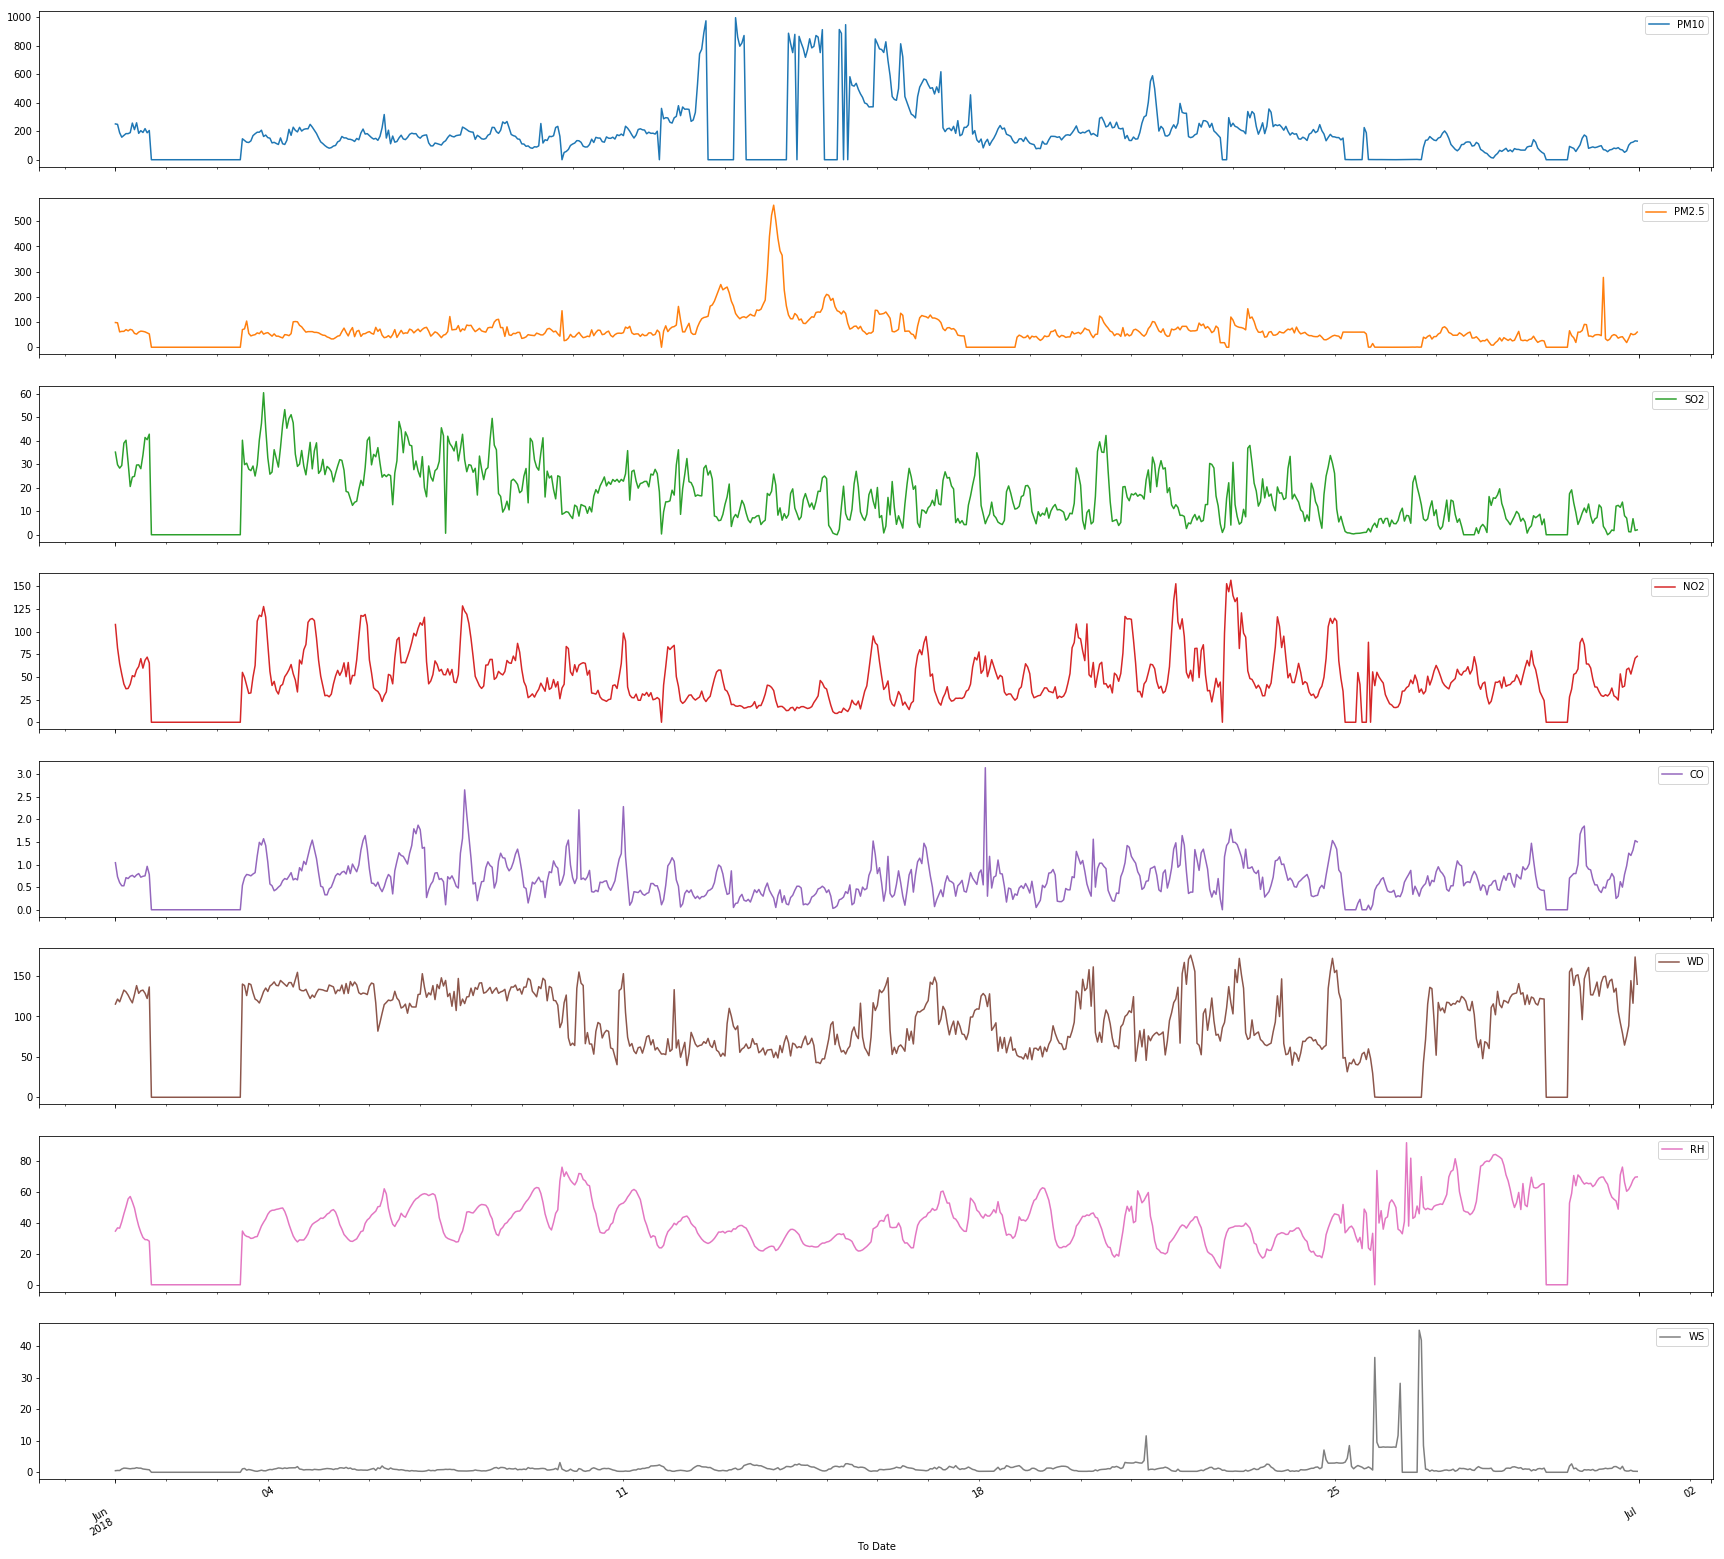

In [74]:
cols = ["PM10", "PM2.5", "SO2", "NO2", "CO", "WD", "RH", "WS"]
june_2018[cols].plot(subplots = True, figsize = (30,30));

plt.legend()


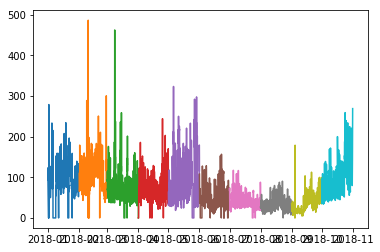

In [54]:
plt.plot(jan_2018["NO2"] ) 
plt.plot(feb_2018["NO2"] ) 
plt.plot(mar_2018["NO2"] ) 
plt.plot(apr_2018["NO2"] ) 
plt.plot(may_2018["NO2"] ) 
plt.plot(june_2018["NO2"] ) 
plt.plot(july_2018["NO2"] ) 
plt.plot(aug_2018["NO2"] ) 
plt.plot(sept_2018["NO2"] ) 
plt.plot(oct_2018["NO2"] )

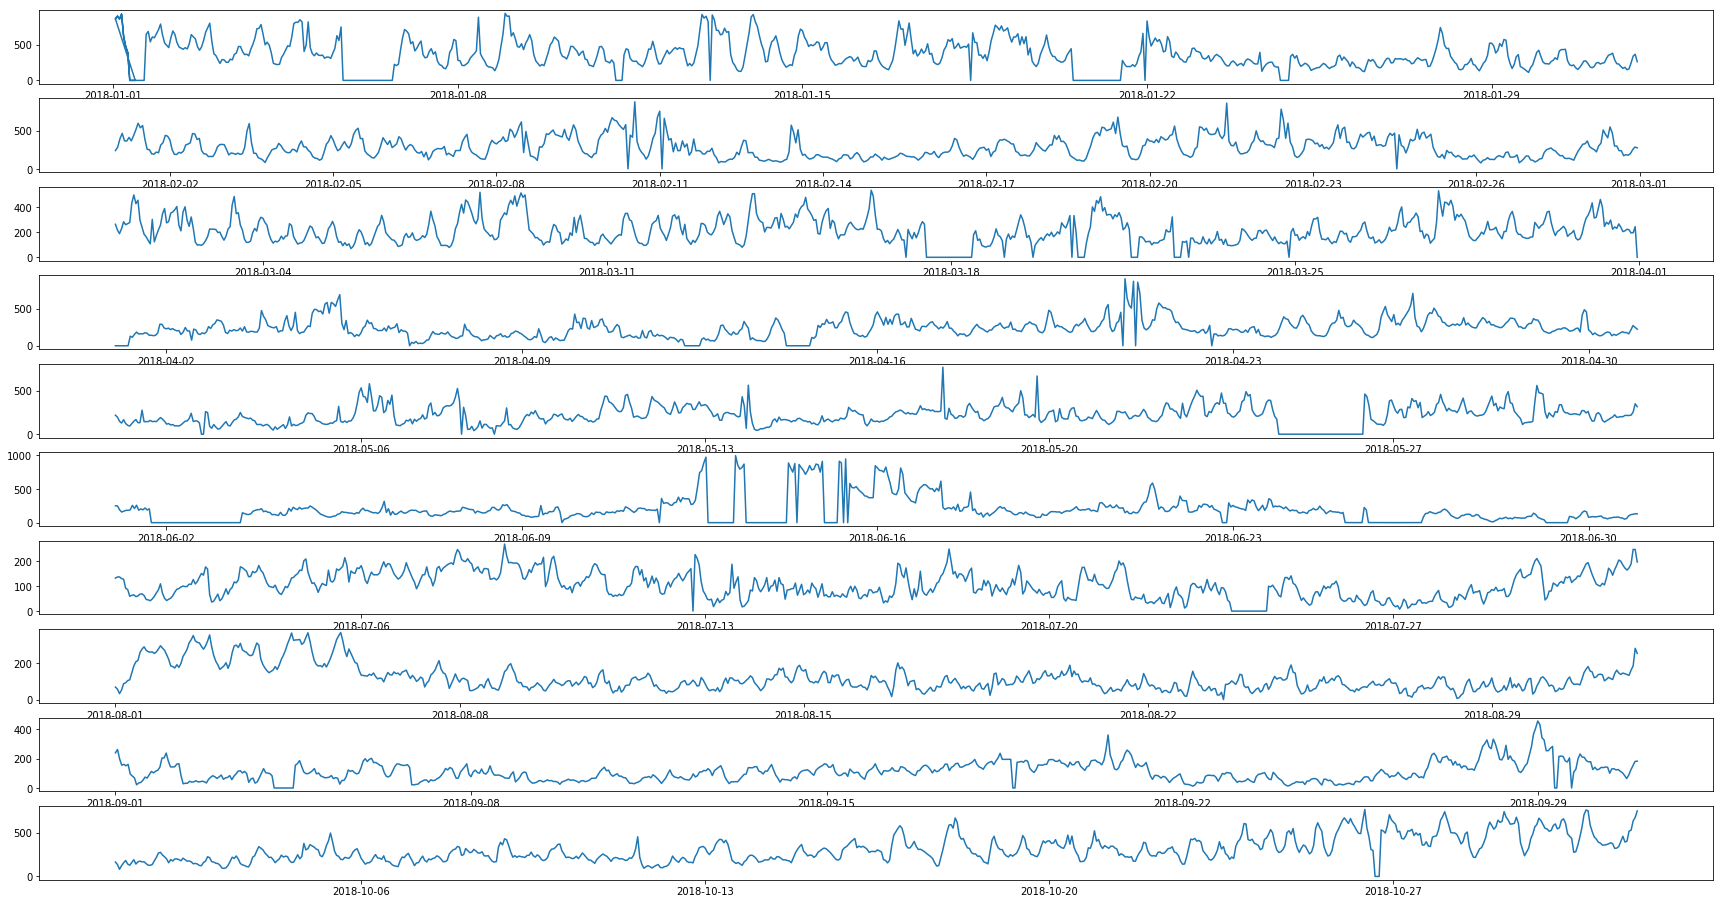

In [44]:
fig, ax = plt.subplots(10, figsize = (30,16))
ax[0].plot(jan_2018["PM10"] ) 
ax[1].plot(feb_2018["PM10"] ) 
ax[2].plot(mar_2018["PM10"] ) 
ax[3].plot(apr_2018["PM10"] ) 
ax[4].plot(may_2018["PM10"] ) 
ax[5].plot(june_2018["PM10"] ) 
ax[6].plot(july_2018["PM10"] ) 
ax[7].plot(aug_2018["PM10"] ) 
ax[8].plot(sept_2018["PM10"] ) 
ax[9].plot(oct_2018["PM10"] )
#ax[2].plot(grishma_2018["PM10"])
#ax[3].plot(grishma_2019["PM10"])

In [ ]:
may_2018.set_index("d")[['WS', 'WD', 'RH', 'AT', 'PM2.5', 'PM10']].plot(figsize = (20,35), marker = 'o', linestyle = '', subplots = True);